## Regularization on least square approximation problems 

#### Introduction 

In an over-determined system, we have more number of equations than the number of variables.

To define our Ax = b, we have to take care about the dimensions of each objects.
- dim(A): n \times m
- dim(x): m \times p
	- Row: The number of rows of $x$ ($m$) should match the number of columns of $A$ ($m$) ensuring $Ax$ is valid. 
	- Column: The number of column of $x$ ($p$) can be greater than $1$ if we are solving a system with multiple sets of variables. 
- dim(b): n \times p
	- It is determined by the dimension of $A$ and $x$. Nothing special here. 

<img src="../Images/overdet.png" 
     align="left" 
     width="500" />

## Sparse L1 regularization

$\underset{x}{argmin} ||Ax - b||_2 + \lambda ||x||_1$

In the following example, we perform L1 regularization on linear regression problem ($Ax = b$) while also encouraging sparisity in the solution ($\lambda||x||_1$)

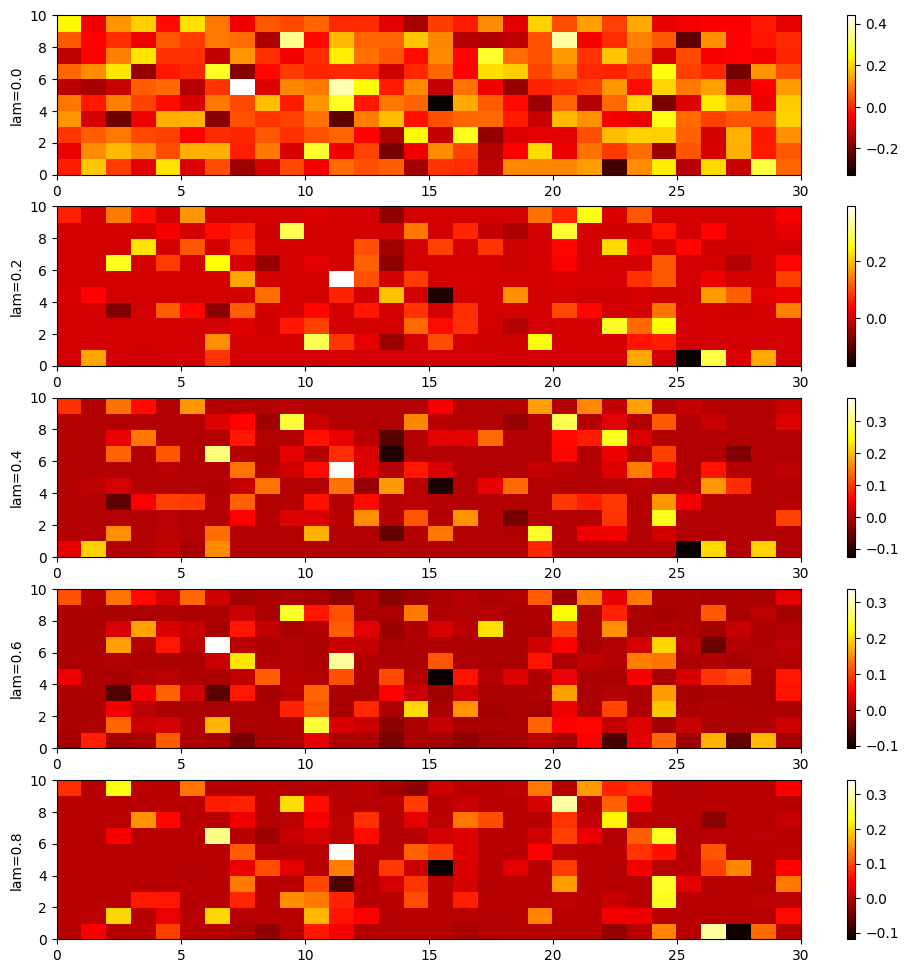

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
from scipy.optimize import fmin

from matplotlib import rcParams

## Matrix Overdetermined System
plt.rcParams['figure.figsize'] = [12, 12]

# overdetermined
n = 100 # 300 constraints, which means there are 300 equations in the overdetermined system.
m = 30
p = 10

# construct random matrices A and b
A = np.random.rand(n,m)
b = np.random.rand(n,p)

# collection of lambda. Here we have 0 and 0.1. 
lam = np.array([0,0.2, 0.4, 0.6, 0.8]) 

xdag = np.linalg.pinv(A)@b #using pseudo-inverse to solve Ax = b

# `.reshape(-1)` used to flatten the array, transform xdag from 2D to 1D, ensuring that xdag is a vector in the optimization routine.
xdag = xdag.reshape(-1)

def reg_norm_2d(x,A,b,lam,m,p):
    # scipy minimize() does not accept multidimensional x
    # To get around this, we pass x as a vector and reshape it outside the function.
    
    # After `cvx` completed the optimization, we convert back 1D array to 2D array. 
    x = np.reshape(x,(m,p))
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)


fig,axs = plt.subplots(len(lam),1)
for j in range(len(lam)):
    # run 2D normalization, with `cvx` package. 
    res = minimize(reg_norm_2d,args=(A,b,lam[j],m,p),x0=xdag)
    x = res.x
    x = x.reshape(m,p)
    x_pcolor = axs[j].pcolor(x.T,cmap='hot')
    fig.colorbar(x_pcolor, ax=axs[j])
    axs[j].set_ylabel('lam='+str(lam[j]))
    
plt.show()